# 互评作业3: 分类与预测
**姓名**：聂宇翔  
**学号**：1120161722  
**所选择的问题**：Hotel booking demand, 酒店预订需求  
**Github地址**：https://github.com/JerrryNie/dataMining  
**注**：数据集处理代码、数据挖掘代码以及挖掘过程报告已经按照一定的顺序整理在这个notebook中  
**运行建议**：如果要对本人分析代码进行运行，只需要把该notebook与数据集放在同一个目录下运行即可

# 内容  
## 1. 数据集：Hotel booking demand
### 1.0. 数据预处理
### 1.1. 基本情况：城市酒店和假日酒店预订需求和入住率比较
### 1.2. 用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况
### 1.3. 一年中最佳预订酒店时间
### 1.4. 利用Logistic预测酒店预订


## 1. 数据集：Hotel booking demand

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
from matplotlib import pyplot as plt
data = pd.read_csv('./hotel_bookings.csv')

### 1.0. 数据预处理

在对数据进行预处理之前，首先对数据的情况进行简要展示。

In [2]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

查看一下缺失值的情况：

In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

由于‘country’属性中具有缺失值的数据太多，并且这个属性在本次数据挖掘任务中并不需要，因此我们先将该属性去掉，并在此基础上剔除数据中的缺失值：

In [5]:
data = data.drop(['company'], axis = 1)
data = data.dropna()
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
hotel                             102894 non-null object
is_canceled                       102894 non-null int64
lead_time                         102894 non-null int64
arrival_date_year                 102894 non-null int64
arrival_date_month                102894 non-null object
arrival_date_week_number          102894 non-null int64
arrival_date_day_of_month         102894 non-null int64
stays_in_weekend_nights           102894 non-null int64
stays_in_week_nights              102894 non-null int64
adults                            102894 non-null int64
children                          102894 non-null float64
babies                            102894 non-null int64
meal                              102894 non-null object
country                           102894 non-null object
market_segment                    102894 non-null object
distribution_channel              102894 n

### 1.1. 基本情况：城市酒店和假日酒店预订需求和入住率比较
首先我们来看一下‘hotel’的类型

In [7]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

可见只有两种Hotel：'Resort Hotel'（假日酒店）, 'City Hotel'（城市酒店）
我们再来看看预定的状态有哪些：

In [8]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

可见，真实入住过的房间，一定会存在‘Check-Out’（结账状态），目前未入住的为‘No-Show’状态，取消预定的为‘Canceled’状态。  
因此，我们以'Check-Out', 'Canceled', 'No-Show'这三个属性的总量作为预定需求的衡量，以'Check-Out'与预定总量的比率作为实际的入住率。  

In [9]:
data.hotel.value_counts()

City Hotel      71181
Resort Hotel    31713
Name: hotel, dtype: int64

因此城市酒店的预定需求为71181， 假日酒店的预定需求为31713。
现在对真实入住的情况进行统计：

In [10]:
dataCheckOut = data.loc[data['reservation_status']=='Check-Out']
dataCheckOut.hotel.value_counts()

City Hotel      40704
Resort Hotel    22029
Name: hotel, dtype: int64

可见，实际入住的数量情况为：城市酒店是40704个，假日酒店为22029个。
因此二者的入住率可分别计算为：

In [11]:
print('Occupancy rate:')
print('City Hotel: ', 40704/71181.0)
print('Resort Hotel: ', 22029/31713.0)

Occupancy rate:
City Hotel:  0.5718379904749863
Resort Hotel:  0.694636269037934


城市酒店的入住率为0.5718379904749863, 假日酒店的入住率为0.694636269037934。因此假日酒店的入住情况要好于城市酒店。

### 1.2. 用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况
首先定义函数plotHist用于对数值属性进行可视化

In [12]:
def plotHist(data, colName, divisionNum=20):
    col = data[colName].dropna()
    plt.hist(col, divisionNum)
    plt.title(colName)
    plt.show()

首先对提前预定时间进行分析：

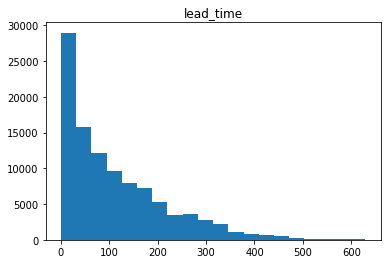

In [13]:
attributeName = 'lead_time'
plotHist(data, attributeName)

可见，大部分情况会提前至多200天就进行预订。其中预定后在一天之内马上入住的人最多。

对入住时长进行分析：

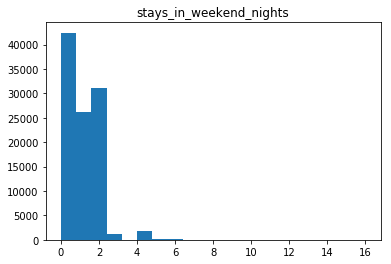

In [14]:
attributeName = 'stays_in_weekend_nights'
plotHist(data, attributeName)

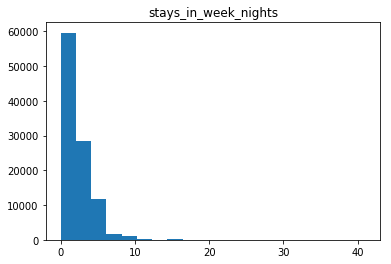

In [15]:
attributeName = 'stays_in_week_nights'
plotHist(data, attributeName)

由以上两图可见，大部分人的入住时间在1周之内。  
对预定间隔进行分析：

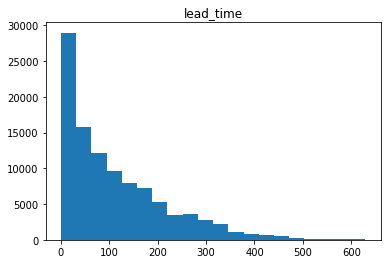

In [16]:
attributeName = 'lead_time'
plotHist(data, attributeName)

可见，更多的人更习惯于预定时间和入住时间距离较短的方案。  
对餐食预订情况进行分析（首先需要将'meal'属性转换为数值属性）：

In [17]:
print('meal', data['meal'].unique())
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

data['meal'] = label_encoder.fit_transform(data['meal'])
print('meal', data['meal'].unique())

meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
meal [0 1 2 3 4]


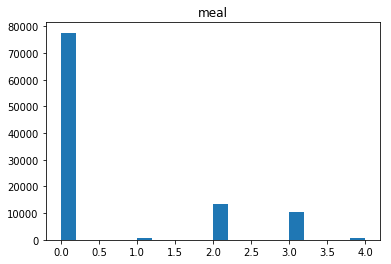

In [18]:
attributeName = 'meal'
plotHist(data, attributeName)

可见，绝大部分人所选择的餐食都是‘BB’类型的。

### 1.3. 一年中最佳预订酒店时间
本部分将从最佳预订的月份、周数和日期的角度对最佳预订时间进行分析。
（先将月份属性从标称属性转换为数值属性）月份分析：

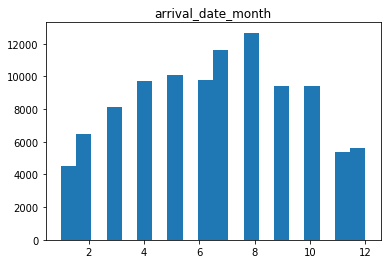

In [19]:
data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
attributeName = 'arrival_date_month'
plotHist(data, attributeName)

可见6-8月是一年中的最佳预订时间。  
周数分析：

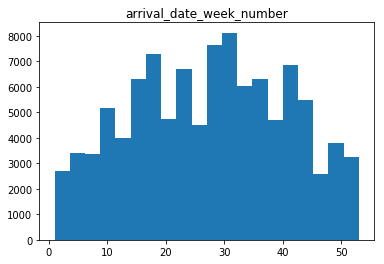

In [20]:
attributeName = 'arrival_date_week_number'
plotHist(data, attributeName)

周数的分析进一步验证了6-8月是最佳预订月份的结论。  
日期分析：

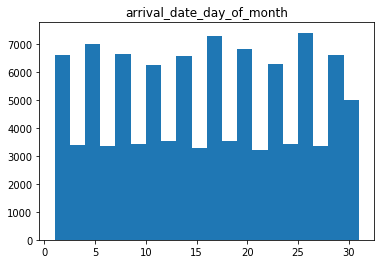

In [21]:
attributeName = 'arrival_date_day_of_month'
plotHist(data, attributeName)

然而在一个完整的月份中，基本上不存在某一天较为适合预订酒店。

### 1.4. 利用Logistic预测酒店预订
为了进行Logistic预测，我们首先需要将所需的标称属性编码为数值属性：

In [22]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
  
data['customer_type']= label_encoder.fit_transform(data['customer_type']) 
data['assigned_room_type'] = label_encoder.fit_transform(data['assigned_room_type'])
data['deposit_type'] = label_encoder.fit_transform(data['deposit_type'])
data['reservation_status'] = label_encoder.fit_transform(data['reservation_status'])
data['meal'] = label_encoder.fit_transform(data['meal'])
data['country'] = label_encoder.fit_transform(data['country'])
data['distribution_channel'] = label_encoder.fit_transform(data['distribution_channel'])
data['market_segment'] = label_encoder.fit_transform(data['market_segment'])
data['reserved_room_type'] = label_encoder.fit_transform(data['reserved_room_type'])
data['reservation_status_date'] = label_encoder.fit_transform(data['reservation_status_date'])

然后我们以酒店预订的最终状态‘reservation_status’为所要预测的对象，以其他属性作为输入，构建Logistic模型：

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [24]:
X = data.drop(['reservation_status'], axis = 1)
y = data['reservation_status']

按8：2的比例划分训练集与测试集：

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

利用Logistic Regression模型，对‘reservation_status’属性进行预测，并通过各类评价指标，对模型预测的结果进行评价：

In [26]:
logreg = LogisticRegression(solver = 'lbfgs')
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print('Mean Absolute Error_logreg:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_logreg:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_logreg:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_logreg:', r2_score(y_test, y_pred).round(3))


Mean Absolute Error_logreg: 0.2
Mean Squared Error_logreg: 0.208
Root Mean Squared Error_logreg: 0.456
r2_score_logreg: 0.179


最后的结果显示，Logistic Regression的平均绝对误差为0.2, 均方误差为0.208, 均方根误差为0.456, r2决定系数的值为0.179。